In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset - replace 'dataset.csv' with the actual file path
df = pd.read_csv('data/sierraleone-bumbuna.csv')

In [7]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [6]:
negative_values = df.loc[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
if not negative_values.empty:
    print("Negative Values Detected:")
    print(negative_values)

Negative Values Detected:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

 

In [9]:

summary_stats = df.describe()
print("Summary Statistics")
print(summary_stats)

Summary Statistics
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.

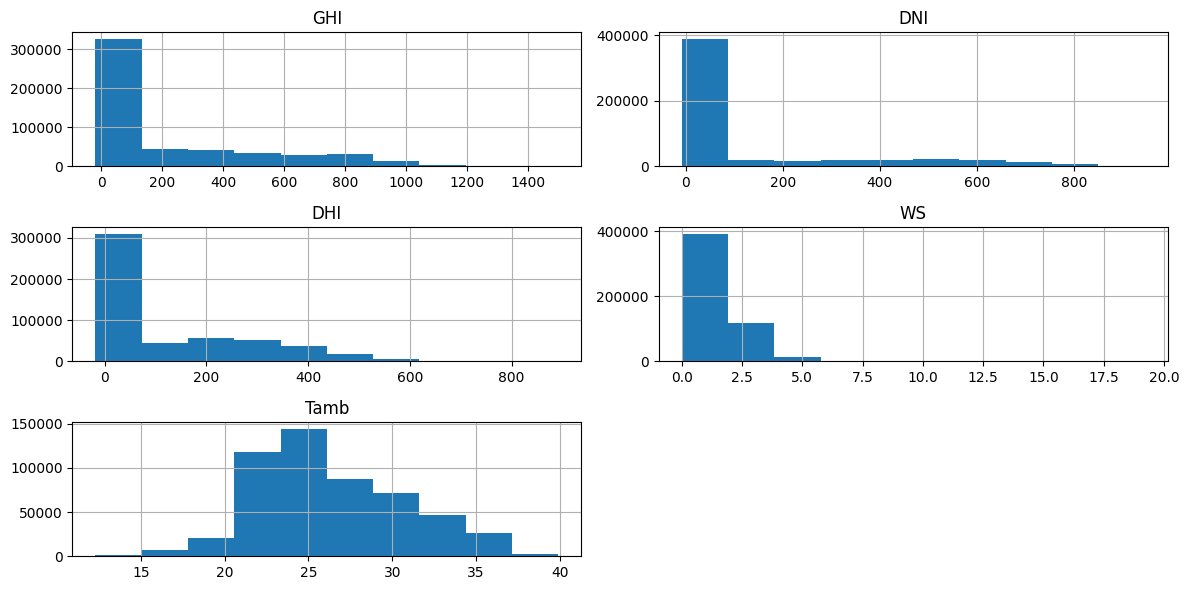

In [11]:
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
plt.tight_layout()
plt.show()

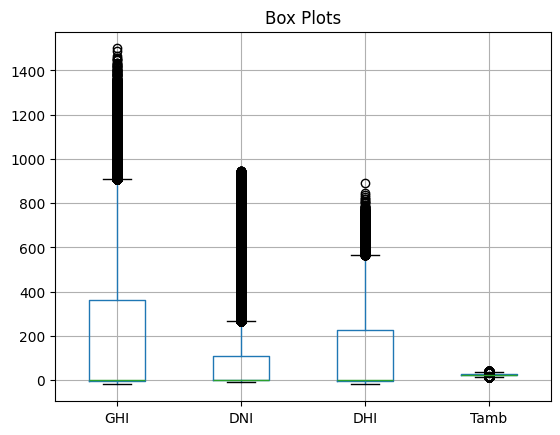

In [12]:
df[['GHI', 'DNI', 'DHI', 'Tamb']].boxplot()
plt.title("Box Plots")
plt.show()

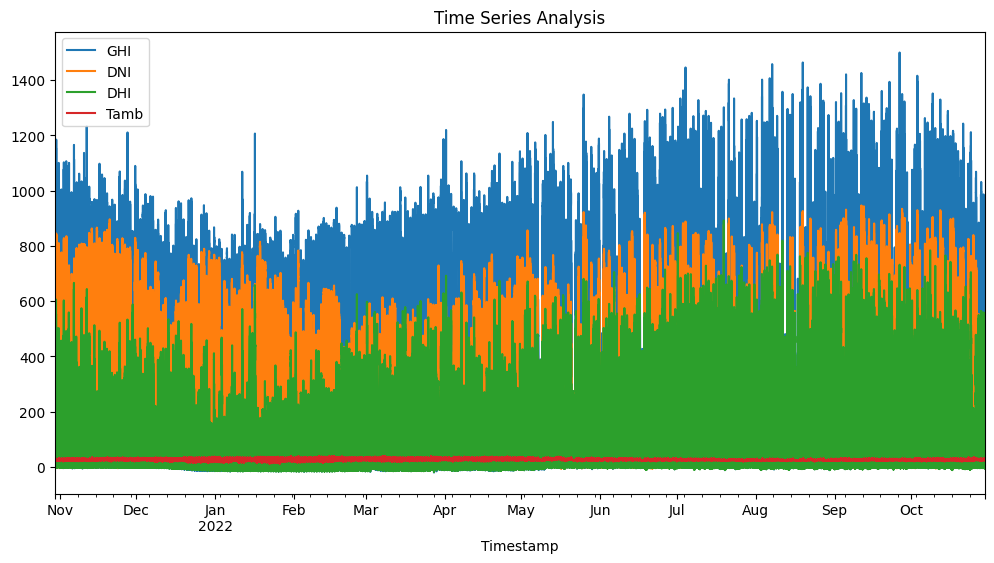

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis")
plt.show()

In [7]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    GHI       DNI       DHI      ModA      ModB      Tamb  \
GHI            1.000000  0.877293  0.852080  0.994964  0.995439  0.562533   
DNI            0.877293  1.000000  0.532717  0.889702  0.889708  0.504499   
DHI            0.852080  0.532717  1.000000  0.833037  0.832648  0.489758   
ModA           0.994964  0.889702  0.833037  1.000000  0.999564  0.561114   
ModB           0.995439  0.889708  0.832648  0.999564  1.000000  0.556133   
Tamb           0.562533  0.504499  0.489758  0.561114  0.556133  1.000000   
RH            -0.258077 -0.327887 -0.155016 -0.287038 -0.280072 -0.400410   
WS             0.421698  0.366667  0.390597  0.420344  0.421543  0.197145   
WSgust         0.443923  0.384870  0.410531  0.442563  0.443570  0.221104   
WSstdev        0.399646  0.343437  0.367005  0.398559  0.398978  0.227084   
WD             0.089896 -0.017950  0.154095  0.057154  0.061090  0.094900   
WDstdev        0.479291  0.397511  0.454318  0.472525  0

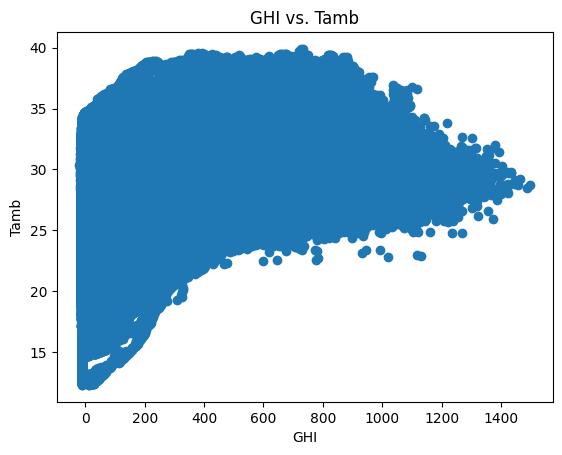

In [16]:
plt.scatter(df['GHI'], df['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs. Tamb')
plt.show()

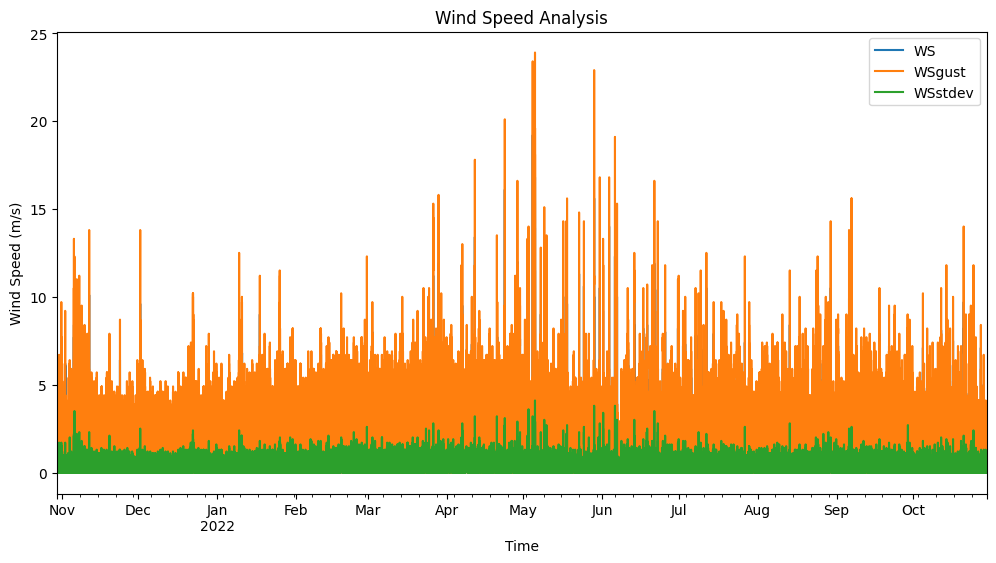

In [17]:
df[['WS', 'WSgust', 'WSstdev']].plot(figsize=(12, 6))
plt.title('Wind Speed Analysis')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.show()

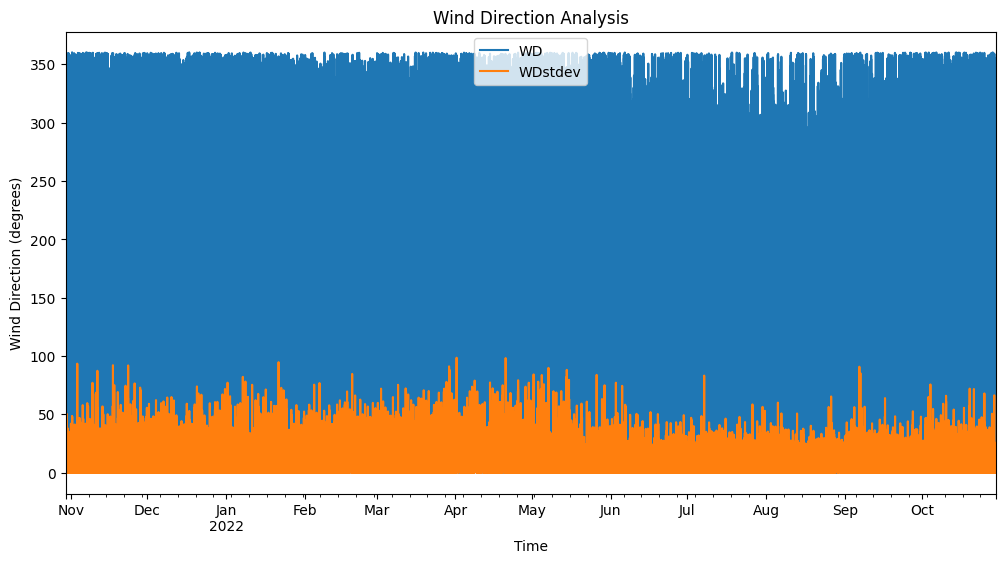

In [18]:
df[['WD', 'WDstdev']].plot(figsize=(12, 6))
plt.title('Wind Direction Analysis')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.show()

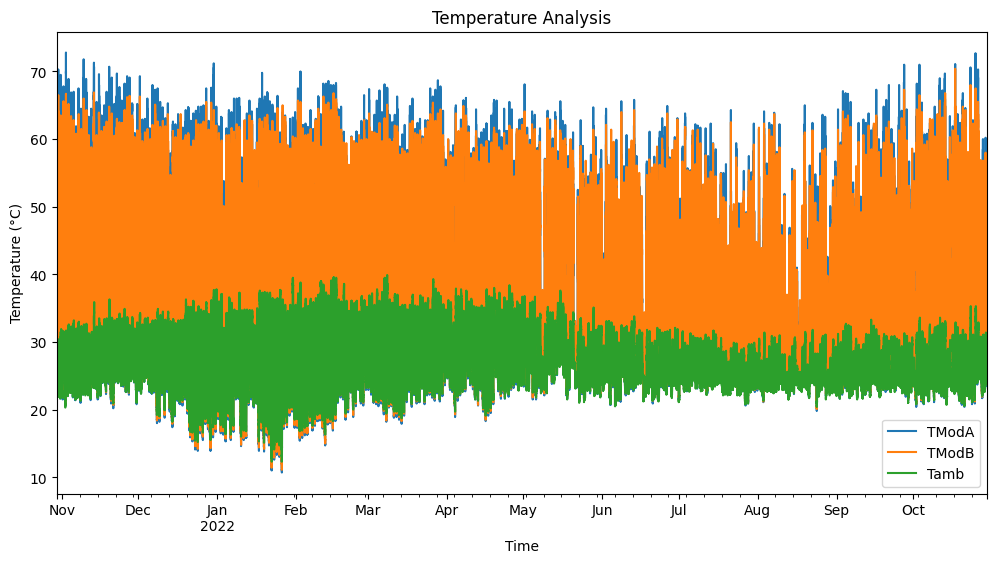

In [19]:
df[['TModA', 'TModB', 'Tamb']].plot(figsize=(12, 6))
plt.title('Temperature Analysis')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

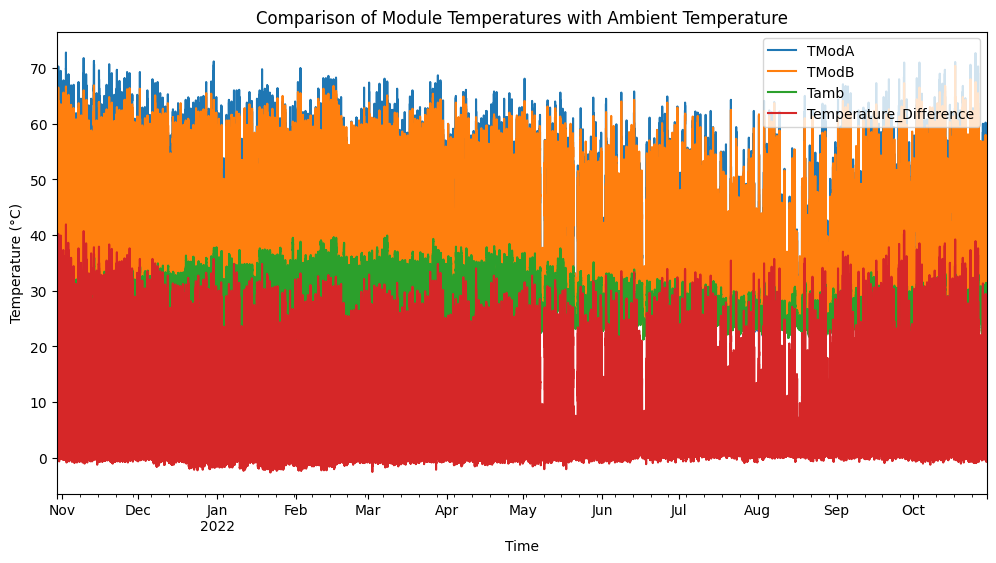

In [20]:
df['Temperature_Difference'] = df['TModA'] - df['Tamb']
df[['TModA', 'TModB', 'Tamb', 'Temperature_Difference']].plot(figsize=(12, 6))
plt.title('Comparison of Module Temperatures with Ambient Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()